In [ ]:
from avcv.all import *

In [ ]:
cc = CocoDataset('../.cache/out_jsons/pred_face_on_val.json', '/data/DMS_Behavior_Detection/merge-phone-cigaret-food/images')

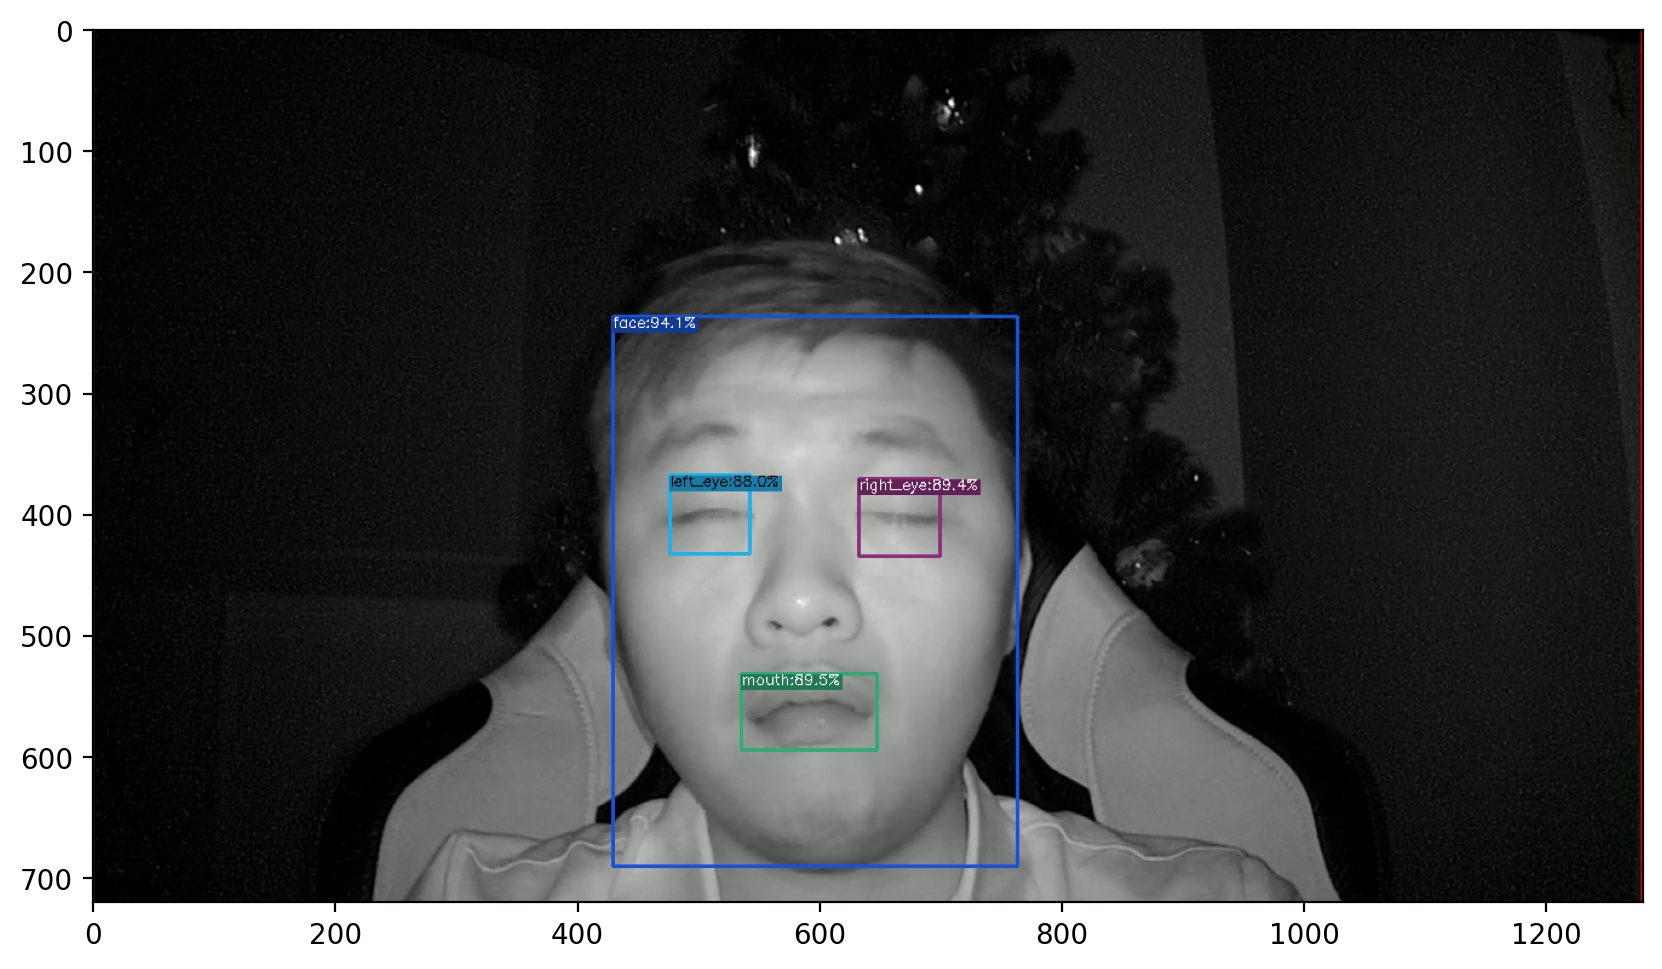

In [ ]:
cc.visualize(img_id=2798, show=1, dpi=200);

In [ ]:
cc.gt.cats

{1: {'id': 1, 'name': 'face'},
 2: {'id': 2, 'name': 'left_eye'},
 3: {'id': 3, 'name': 'right_eye'},
 4: {'id': 4, 'name': 'mouth'}}

In [ ]:
list(sorted([1,5,2]))

[1, 2, 5]

In [ ]:
from fastcore.all import *
class FaceAnalizer:
    def __init__(self, anns, threshold=0.7):
        store_attr('anns,threshold')

    def analize(self):
        face = self.get_face()
        le = self.get_left_eye()
        ry = self.get_right_eye()
        mouth = self.get_mouth()
        
        if face is None:
            return -1
        else:
            c = int(le is not None)+int(re is not None)+int(mouth is not None)
            if c <2 :
                return -2
            else:
                return 1
        
    def get_face(self):
        anns = [ann for ann in self.anns if ann['category_id']==1 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))
        if len(anns):
            return anns[-1]
        return None
    
    def get_left_eye(self):
        anns = [ann for ann in self.anns if ann['category_id'] == 2 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))

        if len(anns):
            return anns[-1]
        return None
    def get_right_eye(self):
        anns = [ann for ann in self.anns if ann['category_id'] == 3 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))

        if len(anns):
            return anns[-1]
        return None
    
    def get_mouth(self):
        anns = [ann for ann in self.anns if ann['category_id'] == 4 if ann['score']>self.threshold]
        anns = list(sorted(anns, key=lambda ann:ann['score']))

        if len(anns):
            return anns[-1]
        return None
        

In [ ]:
f = FaceAnalizer(anns)

In [ ]:
f.get_face()

{'image_id': 13019,
 'category_id': 1,
 'bbox': [523.5084838867188,
  311.1512451171875,
  253.5665283203125,
  321.2049560546875],
 'score': 0.9454116821289062,
 'segmentation': [],
 'area': 81446.82558606565,
 'id': 1,
 'iscrowd': 0}

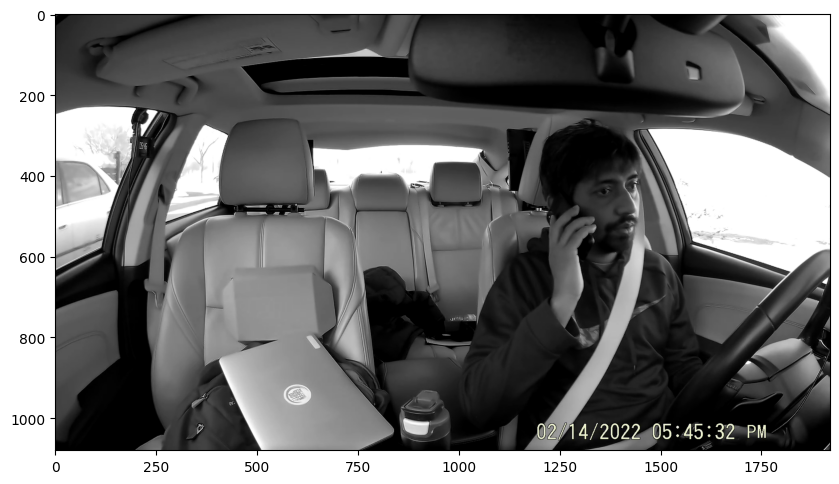

{'file_name': '../../Mobile_Cigarret_DB/AIC_DB_Raw_cut_frames_old/Rear_view_User_id_49381_0_Phone_Call_right_002/Rear_view_User_id_49381_0_Phone_Call_right_002_00448.png', 'height': 1080, 'id': 7189, 'width': 1920}


In [ ]:
for img_id, row in df[df.fa!=1].iterrows():
    cc.visualize(img_id, show=1)
    print(cc.gt.imgs[img_id])
    break